<a href="https://colab.research.google.com/github/Zaqzxcswsde/itmo-applied-statistics/blob/main/stat_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TODO: переделать парсинг, чтобы работал с дробями и переменными

Don't forget to import functions from all of the weeks!

In [ ]:
#@title Imports { display-mode: "form" }
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from os import listdir
# from google.colab import drive
#drive.mount('/content/drive')
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import product
from scipy import special
# как можно скачать файл напрямую из гуглдиска сюда в директорию /content
# !gdown 1Xtw5-jqrDJmh318t1jtKHvOJXxMrB9XF
from math import factorial
from decimal import *
import sympy
from math import fsum
from fractions import Fraction
import scipy
from scipy import stats
from sympy import integrate, Symbol
from math import pi,sqrt
from numpy import exp
from more_itertools import pairwise
import math
import csv
import urllib.request
import os

---
---
---

# Week 1

---
## Function Definitions

In [ ]:
#@title Получить произведение всех чисел в листе
def list_product(array):
  s = 1
  for i in array:
    s *= Decimal(i)
  return s

In [ ]:
#@title Функции комбинаторики

# формула C из комбинаторики с повторениями и без
def comb(n,k, *, repetition=0):
  if repetition: return comb(n+k-1,k)
  else: return Decimal(factorial(n))/Decimal(Decimal(factorial(k))*Decimal(factorial(n-k)))

# 4 основные функции комбинаторики объединены в одну, повторения есть? порядок важен? n? k?
def prob(n,k,o,r):
  if not o: return Decimal(comb(n,k,repetition=r))
  elif r: return Decimal(n)**Decimal(k)
  else: return Decimal(special.perm(n,k))

# упрощённый доступ напрямую к C из n по k
def cnk(n,k):
  return Decimal(prob(n,k,0,0))

In [ ]:
#@title Конкатенация листа в строчку
def conc(lst):
  c = ''
  for i in lst:
    c+=str(i)
  return c

In [ ]:
#@title Является ли число факториалом другого?
def isfactorial(x):
  if not isinstance(x,int) or x<1: return -1
  i=0
  while factorial(i)<x:
    i+=1
  if factorial(i)==x: return i
  else: return -1

In [ ]:
#@title Перевод числа в 6-ти-ричную систему
def tosix(n):
    if n == 0:
        return ['0']
    digits = []
    while n:
        digits.append(str(int(n % 6)))
        n //= 6
    return digits[::-1]

In [ ]:
#@title Является ли лист уникальным? Не работает, если там хранятся другие листы (и прочие нехешитруемые типы)
def isunique(lst):
  return len(list(lst)) == len(list(set(list(lst))))

---
## Code itself

In [ ]:
# сколько из всех вариантов пар произведений чисел от 1 до 4 целочисленно делятся на три 
list(map(lambda a: a % 3, map(lambda a: a[0]*a[1], itertools.product(np.arange(1,5),np.arange(1,5))))).count(0)

7

In [ ]:
# у скольки из всех вариантов пар произведений чисел от 1 до 4 сумма превышает произведение 
len([1 for a in itertools.product(np.arange(1,5),np.arange(1,5)) if a[0]+a[1]>a[0]*a[1]])

7

In [ ]:
# сколькими способами можно выбрать из n пар детей двих так, чтобы они были из разных пар?
pair_count=3
4*sum(range(1,pair_count))

12

In [ ]:
# или так
all_possible_combinations=list(map(list,list(product(range(6),repeat=2))))
all_possible_pair_variations=[[x[0]//2,x[1]//2] for x in all_possible_combinations]
apc_with_rep_1=list(map(set,all_possible_combinations))
apc_with_rep_2=[x for x in apc_with_rep_1 if len(x)>1]
apc_without_rep=list(map(list,(set(map(tuple,apc_with_rep_2)))))
apc_with_rep_pairs_1=[[x[0]//2,x[1]//2] for x in list(map(list,apc_without_rep))]
apc_with_rep_pairs_2=list(map(set,apc_with_rep_pairs_1))
apc_without_rep_pairs=[x for x in apc_with_rep_pairs_2 if len(x)==2]
len(apc_without_rep_pairs)

12

In [ ]:
# из цифр от 0 до 5 составили декартово проиведение длиной 4, в скольких вариантах нет повторений цифр?
# способ 1
len([x for x in map(set,product(range(0,6),repeat=4)) if len(x)==4])

360

In [ ]:
# способ 2
sum(list(map(isunique,[''.join(tosix(x)).zfill(4) for x in range(0,6**4)])))

360

In [ ]:
# или так! 6 вариантов на первую, 5 на вторую и тд до четвёртой
6*5*4*3

360

---
---
# Week 2


---
## Function definitions

In [ ]:
#@title Парсинг таблиц из опенеду в датафрейм/серию/лист
# Работает только с числовыми значениями, не работает с переменными или дробями - TODO
def OpenEduTexToArrayOfArrays(full_tex,dec=True):
  def is_float(element):
    try:
        float(element)
        return True
    except ValueError:
        return False
  full_tex=full_tex.replace(r'\hline','\n')      
  full_tex=list(map(lambda a: a.split(),full_tex.split('\n')))
  for i,x in enumerate(full_tex):
    full_tex[i]=[y for y in x if is_float(y)]
  full_tex = [x for x in full_tex if len(x)>0]
  if dec:
    for i,x in enumerate(full_tex):
      full_tex[i]=list(map(lambda a: Fraction(str(a)),x))
  return full_tex
def ArrayOfArraysWithIndexsAndColumnsToDataFrame(arrofarr):
  if len(arrofarr)<=2: raise RuntimeError('don\'t use this function for series!')
  if len(arrofarr[0])<len(arrofarr[1]): arrofarr[0] = [''] + arrofarr[0]
  npaoa = np.array(arrofarr)
  return DataFrame(npaoa[1:,1:],columns=npaoa[0,:][1:],index=npaoa[:,0][1:],dtype="object")
def TTDFOVAP(full_tex,dec=True): # TexToDataFrameOrValsAndProbs
  arrofarr=OpenEduTexToArrayOfArrays(full_tex,dec=dec)
  if len(arrofarr)==1: return arrofarr[0]
  elif len(arrofarr)==2: return (arrofarr[0],arrofarr[1])
  else: return ArrayOfArraysWithIndexsAndColumnsToDataFrame(arrofarr)

In [ ]:
#@title Медиана распределения случайной величины
def myMedian(vals, probs):
  m_1 = [i for i,_ in enumerate(probs) if ((sum(probs[:i+1])>0.5) and (sum(probs[i:])>0.5))]
  m_1_e = [vals[v] for v in m_1]
  m_2 = m_1_e[0] if len(m_1_e)==1 else (max(m_1_e)+min(m_1_e))/2
  return m_2

In [ ]:
#@title Проверка величин на независимость, !!!!!внутри DataFrame'а нужны Decimal'ы/Fractions'ы!!!!!
def CheckIndependence(df):
  xsi=df.sum(axis=0) # this produces series of decimals, as expected
  # eta=df.sum(axis=1) # this instead produces series of floats, not decimals - presumably pandas bug
  eta=Series({k:v.sum() for k,v in df.iterrows()})
  # xsi=xsi.apply(lambda a: Decimal(str(a)))
  # eta=eta.apply(lambda a: Decimal(str(a)))
  df2 = pd.DataFrame(columns=df.columns, index=df.index)
  for i in df.columns:
    for j in df.index:
      df2[i][j]=xsi[i]*eta[j]
  return df.equals(df2)

In [ ]:
#@title Математическое ожидание распределения случайной величины
def myExpectedValue(vals, probs):
  vals = np.asarray(vals)
  probs = np.asarray(probs)
  return (vals * probs).sum()

In [ ]:
#@title Совместное распределение -> мат.ожидание их произведения
def TablToExpectedOfMult(df):
  df2=DataFrame(columns=df.columns,index=df.index)
  for i in df2.columns:
    for j in df2.index:
      df2[i][j]=i*j
  ss={}
  for i in df2.columns:
    for j in df2.index:
      if df2[i][j] in ss.keys():
        ss[df2[i][j]]+=df[i][j]
      else:
        ss[df2[i][j]]=df[i][j]
  # print(ss)
  return sum(np.asarray(list(ss.keys()))*np.asarray(list(ss.values())))

In [ ]:
#@title Распределение случайной величины -> дисперсия
def MyVariance(vals,probs):
  ev = myExpectedValue(vals,probs)
  vals2=[(x-ev)**2 for x in vals]
  disp = myExpectedValue(vals2,probs)
  return disp

In [ ]:
#@title Распределение случайной величины -> дисперсия 2
def MyVariance2(vals,probs):
  ev = myExpectedValue(vals,probs)
  vals2=[x**2 for x in vals]
  disp = myExpectedValue(vals2,probs)
  return disp-ev**2

In [ ]:
#@title Совместное распределение -> мат.ожидание обеих - сначала по столбцам, потом по строкам
def MyJointDistributionToExpectedOfBoth(df):
  xsi,eta=MyJointDistributionToMarginalDistribution(df)
  xsi_ev=myExpectedValue(xsi.index,xsi.values)
  eta_ev=myExpectedValue(eta.index,eta.values)
  return (xsi_ev,eta_ev)

In [ ]:
#@title Совметное распределение -> маргинальное распределение
def MyJointDistributionToMarginalDistribution(df):
  xsi=df.sum(axis=0)
  eta=Series({k:v.sum() for k,v in df.iterrows()})
  return (xsi,eta)

In [ ]:
#@title Маргинальное распределение / дисперсия -> СКО
def MyStandardDeviation(vals=None,probs=None,var=None):
  if not var: return decimal_from_fraction(MyVariance(vals,probs))**Decimal(0.5)
  else: return decimal_from_fraction(var)**Decimal(0.5)

In [ ]:
#@title Совметное распределение -> ковариация
def MyCovariance(df):
  ksi_ev, eta_ev = MyJointDistributionToExpectedOfBoth(df)
  return TablToExpectedOfMult(df) - ksi_ev*eta_ev

In [ ]:
#@title Совметное распределение -> дисперсия обеих
def MyJointDistributionToVarianceOfBoth(df):
  xsi, eta = MyJointDistributionToMarginalDistribution(df)
  xsi_var = MyVariance(xsi.index,xsi.values)
  eta_var = MyVariance(eta.index,eta.values)
  return (xsi_var,eta_var)

In [ ]:
#@title Совметное распределение -> коэффицент корелляции (Пирсона)
def MyPearsonCorrelationCoefficient(df):
  cov = MyCovariance(df)
  if cov == Decimal('0'): return Decimal('0')
  xsi_var, eta_var = MyJointDistributionToVarianceOfBoth(df)
  if xsi_var == eta_var: return cov/xsi_var
  xsi_dev = MyStandardDeviation(var=xsi_var)
  eta_dev = MyStandardDeviation(var=eta_var)
  return decimal_from_fraction(cov)/(xsi_dev*eta_dev)

In [ ]:
#@title Decimal -> Fraction
def decimal_from_fraction(frac):
  if isinstance(frac,Decimal): return frac
  return frac.numerator / Decimal(frac.denominator)

In [ ]:
#@title Схема бернули в нунжном мне виде
def MyBernoulli(n,k,p,q=None): # n - всего, k - нужно удач, p - вероятность удачи, q - вероятность неудачи
  n = Decimal(n)
  k = Decimal(k)
  p = Decimal(str(p))
  if not q: q = Decimal(1-p)
  return Decimal(cnk(n,k))*(Decimal(p)**Decimal(k))*(Decimal(q)**(n-k))

In [ ]:
#@title НЕ ИСПОЛЬЗОВАТЬ! Лобовая реализация вычисления мат. ожидания и дисперсии случайной величины схемы Бернулли
def BAD_MyXsiBernoulli(n,p,q=None):
  if not q: q = 1-p
  vals = range(0,n+1)
  probs = [MyBernoulli(n,x,Decimal(str(p)),Decimal(str(q))) for x in range(0,n+1)]
  ev=myExpectedValue(vals,probs)
  var=MyVariance(vals,probs)
  return (ev,var)

In [ ]:
#@title Нормальная реализация вычисления мат. ожидания и дисперсии случайной величины схемы Бернулли
def MyXsiBernoulli(n,p,q=None):
  if not q: q = 1 - p
  return (n*p,n*p*q)

In [ ]:
#@title Локальная теорема Муавра-Лапласа (n,p,A,B)->val
def MyLocML(n,p,A,B,r=4):
  A,B=min(A,B),max(A,B)
  q=1-p
  # koef=1/(sqrt(2*pi)*sqrt(n*p*q))
  val = round(sum(exp(-(((k-n*p)/(sqrt(n*p*q)))**2)/2) for k in range(A,B+1))*(1/(sqrt(2*pi)*sqrt(n*p*q))),4)
  return val

In [ ]:
#@title Теорема Пуассона (n,p,A,B)->(val,(leftErr,rightErr))
def MyPoisson(n,p,A,B,r=4):
  A,B=min(A,B),max(A,B)
  mu=n*p
  val = round(sum(((Decimal(Decimal(mu)**k)/Decimal(factorial(k))) * (exp(Decimal(-mu)))) for k in range(A,B+1)),r)
  err = Decimal(min(Decimal(str(p)),n*(Decimal(str(p))**2)))
  leftErr = val-err if val-err>0 else 0
  rightErr = val+err if val+err<1 else 1
  return (val,(leftErr,rightErr))

In [ ]:
#@title Интегральная теорема Муавра-Лапласа (n,p,A,B)->(val,err)
def MyIntML(n,p,A,B,r=4):
  A,B=min(A,B),max(A,B)
  q=1-p
  y=(B-n*p)/sqrt(n*p*q)
  z=(A-n*p)/sqrt(n*p*q)
  val = round(scipy.stats.norm.cdf(y)-scipy.stats.norm.cdf(z),r)
  err = round(1/(p*q*sqrt(n)),r)
  return (val,err)

In [ ]:
#@title Пуассон + Локальный М-Л
def MyPML(n,p,A,B,r=4):
  A,B=min(A,B),max(A,B)
  return (MyPoisson(n,p,A,B,r),MyLocML(n,p,A,B,r))

In [ ]:
#@title Бернулли для k между A и B
def MyABBernoulli(n,p,A,B,r=4):
  A,B=min(A,B),max(A,B)
  return round(sum(MyBernoulli(n,k,p) for k in range(A,B+1)),r)

---
## Code itself

### First Half

In [ ]:
# Количество орлов/решек при трёх подбрасываниях монеты
list(map(lambda a: a.count(0), itertools.product([0,1],repeat=3)))
list(map(lambda a: a.count(1), itertools.product([0,1],repeat=3)))

[0, 1, 1, 2, 1, 2, 2, 3]

In [ ]:
# Нахождение подбором одного неизвестного значения случайного распределения по известному математическому ожиданию и остальному распределению
for x in range(-1,14):
  vals = list(map(Decimal,f'-1 & 1 & 4 & {x} & 13'.split(' & ')))
  probs  = list(map(Decimal,'0.1 & 0.15 & 0.4 & 0.2 & 0.15'.split(' & ')))
  if myExpectedValue(vals, probs)==Decimal('5.2'): print(x)

8


In [ ]:
# Автоматическое нахождение уравнения для математического ожидания, хотя можно было просто посмотреть...
vals='3 5 7'.split(' ')
probs='p1 p2 0.3'.split(' ')
expr=sympy.sympify('+'.join([f'{x1}*{x2}' for x1,x2 in zip(vals,probs)]))
expr

3*p1 + 5*p2 + 2.1

In [ ]:
# Тест парсинга в vals,probs
full_tex=r"""\begin{array}{  c | c | c | c | c| c | c| c | c  }
\xi & -4 & -2 & 0 & 3 & 4 & 6 & 7 & 9  \\ \hline
\mathsf{P} & 0.1 & 0.15 & 0.05 & 0.15 & 0.1 & 0.05 & 0.25 & 0.15
\end{array}"""
vals,probs=TTDFOVAP(full_tex,dec=0)
vals,probs

(['-4', '-2', '0', '3', '4', '6', '7', '9'],
 ['0.1', '0.15', '0.05', '0.15', '0.1', '0.05', '0.25', '0.15'])

In [ ]:
# Тест парсинга в датафрейм
full_tex=r"""\begin{array}{  c | c | c | c | c  }
\eta \backslash \xi & -4 & -2 & 0 & 3  \\ \hline
2 & 0.02 & 0.02 & 0.06 & 0.1 \\ \hline
3 & 0.03 & 0.03 & 0.09 & 0.15 \\ \hline
5 & 0.02 & 0.02 & 0.06 & 0.1 \\ \hline
10 & 0.03 & 0.03 & 0.09 & 0.15
\end{array}"""
df = TTDFOVAP(full_tex)

In [ ]:
df

,-4,-2,0,3
2,1/50,1/50,3/50,1/10
3,3/100,3/100,9/100,3/20
5,1/50,1/50,3/50,1/10
10,3/100,3/100,9/100,3/20


In [ ]:
# Проверка независимости

# arr=np.array([[0.02,0.02,0.06,0.1],[0.03,0.03,0.09,0.15],[0.02,0.02,0.06,0.1],[0.03,0.03,0.09,0.15]])
# arr2 = np.vectorize(lambda a: Decimal(str(a)))(arr)
# df = pd.DataFrame(arr2,columns=[-4,-2,0,3], index=[2,3,5,10])

# full_tex=r"""\begin{array}{  c | c | c | c | c  }
# \eta \backslash \xi & -4 & -2 & 0 & 3  \\ \hline
# 2 & 0.02 & 0.02 & 0.06 & 0.1 \\ \hline
# 3 & 0.03 & 0.03 & 0.09 & 0.15 \\ \hline
# 5 & 0.02 & 0.02 & 0.06 & 0.1 \\ \hline
# 10 & 0.03 & 0.03 & 0.09 & 0.15
# \end{array}"""
# df = TTDFOVAP(full_tex)

CheckIndependence(df)

True

In [ ]:
# Нахождение ожидания произведения
TablToExpectedOfMult(df)

Fraction(477, 100)

In [ ]:
# проверка работы нахождения дисперсии
vals=[0,100]
probs=[99/100,1/100]
MyVariance(vals,probs) # MyVariance2(vals,probs)

99.0

In [ ]:
# проверка работы нахождения СКО
xsi,eta = MyJointDistributionToMarginalDistribution(df)
xsi_vals = xsi.index
xsi_probs = xsi.values
eta_vals = eta.index
eta_probs = eta.values

In [ ]:
MyStandardDeviation(xsi_vals,xsi_probs)

Decimal('2.385372088375312569654571324')

In [ ]:
MyStandardDeviation(eta_vals,eta_probs)

Decimal('3.226453160980335694543128270')

In [ ]:
# тест ковариации !
MyCovariance(df)

Fraction(0, 1)

In [ ]:
# тест коэффициента корелляции
MyPearsonCorrelationCoefficient(df)

Decimal('0')

In [ ]:
# Моделирование всего-всего-всего на примере двухкратного бросания игрального кубика
omega = list(itertools.product(np.arange(1,7),repeat=2))

# xsi - количество выпавших единиц
# eta - количество выпавших шестёрок

# xsi - 0/1/2
# eta - 0/1/2
omega_xsi_eta = np.array([[x.count(1),x.count(6)] for x in omega])
omega_xsi, omega_eta = omega_xsi_eta.T

# получаем маргинальное распределение
marg_xsi = np.unique(omega_xsi, return_counts=True)
marg_eta = np.unique(omega_eta, return_counts=True)

# преобразовываем в серию + починим вероятность
xsi = Series(list(map(lambda a: Fraction(a,len(omega)),marg_xsi[1])), index=marg_xsi[0])
eta = Series(list(map(lambda a: Fraction(a,len(omega)),marg_eta[1])), index=marg_eta[0])

# сразу получим совместное распределение
possible_vars = list(map(list,list(itertools.product([0,1,2],repeat=2))))
numbs = ['']*len(possible_vars)
for i,x in enumerate(possible_vars):
  numbs[i] = sum([1 for y in omega_xsi_eta if list(y)==x])
to_df = [[x[0][0],x[0][1],x[1]] for x in list(zip(possible_vars,numbs))]

df = DataFrame(index=[0,1,2],columns=[0,1,2]) 
for x in to_df:
  df[x[0]][x[1]]=Fraction(x[2],len(omega))

In [ ]:
df

,0,1,2
0,4/9,2/9,1/36
1,2/9,1/18,0
2,1/36,0,0


In [ ]:
# Математические ожидания кси/эта
MyJointDistributionToExpectedOfBoth(df)

(Fraction(1, 3), Fraction(1, 3))

In [ ]:
# Дисперсии кси/эта
MyJointDistributionToVarianceOfBoth(df)

(Fraction(5, 18), Fraction(5, 18))

In [ ]:
# Маетматическое ожидание произведения кси/эта
TablToExpectedOfMult(df)

Fraction(1, 18)

In [ ]:
# Ковариация
MyCovariance(df)

Fraction(-1, 18)

In [ ]:
# Коэффициент корелляции
MyPearsonCorrelationCoefficient(df)

Fraction(-1, 5)

In [ ]:
full_tex=r"""\begin{array}{  c | c | c | c | c  }
\xi & -4 & -2 & 0 & 3  \\ \hline
\mathsf{P} & 0.1 & 0.1 & 0.3 & 0.5
\end{array}"""
vals,probs=TTDFOVAP(full_tex)

In [ ]:
MyVariance(vals,probs)

Fraction(569, 100)

In [ ]:
full_tex=r"""\begin{array}{  c | c | c | c  }
\eta \backslash \xi & 2 & 3 & 5  \\ \hline
-1 & 0.1 & 0.3 & 0.2 \\ \hline
1 & 0.1 & 0.05 & 0 \\ \hline
4 & 0 & 0.15 & 0.1
\end{array}"""
df=TTDFOVAP(full_tex)

In [ ]:
df

,2,3,5
-1,1/10,3/10,1/5
1,1/10,1/20,0
4,0,3/20,1/10


In [ ]:
MyCovariance(df)

Fraction(9, 50)

In [ ]:
MyPearsonCorrelationCoefficient(df)

Decimal('0.07664850422701901346493947032')

In [ ]:
BAD_MyXsiBernoulli(10,0.75)

(Decimal('7.50000000000000000000'), Decimal('1.875000000000000000000000000'))

In [ ]:
MyXsiBernoulli(10,0.75)

(7.5, 1.875)

In [ ]:
# Просто для красоты, даже без заголовка и перенесения в блок с функциями :)
def MyDescribe(full_tex):
  df=TTDFOVAP(full_tex)
  print('MarginalDistributions: ', MyJointDistributionToMarginalDistribution(df)[0],MyJointDistributionToMarginalDistribution(df)[1],'------',sep='\n')
  print('ExpectedValues: ', MyJointDistributionToExpectedOfBoth(df),'------',sep='\n')
  print('Variances: ', MyJointDistributionToVarianceOfBoth(df),'------',sep='\n')
  print('Covariance: ', MyCovariance(df),'------',sep='\n')
  print('CorrelationCoefficient: ', MyPearsonCorrelationCoefficient(df), sep='\n')

In [ ]:
full_tex=r""" \begin{array}{   c | c | c | c | c  } \eta \backslash \xi  & 172 & 173 & 177 & 196  \\ \hline 4 & 0.09 & 0.01 & 0.09 & 0.12 \\ \hline 6 & 0.2 & 0.12 & 0.16 & 0.21 \end{array}"""
MyDescribe(full_tex)

MarginalDistributions: 
172    29/100
173    13/100
177       1/4
196    33/100
dtype: object
4    31/100
6    69/100
dtype: object
------
ExpectedValues: 
(Fraction(1813, 10), Fraction(269, 50))
------
Variances: 
(Fraction(10997, 100), Fraction(2139, 2500))
------
Covariance: 
-457/500
------
CorrelationCoefficient: 
-0.09422663788279210798846515087


### Second Half

In [ ]:
# по теореме Пуассона + погрешность, по локальной теореме Муавра-Лапласа
n=100
A=0
B=3
p=0.02
MyPML(n,p,A,B)

((Decimal('0.8571'), (Decimal('0.8371'), Decimal('0.8771'))), 0.8293)

In [ ]:
# по интегральной теореме Муавра-Лапласа + погрешность
p=0.13
n=20000
A=0
B=2650
MyIntML(n,p,A,B)

(0.8534, 0.0625)

In [ ]:
# w2p2t1 - week 2 part 2 task 1
n=1600
p=0.0026
A=5
B=1600

(MyABBernoulli(n,p,A,B),MyPoisson(n,p,A,B),MyIntML(n,p,A,B))

(Decimal('0.4024'),
 (Decimal('0.4024'), (Decimal('0.3998'), Decimal('0.4050'))),
 (0.34, 9.6404))

In [ ]:
# w2p2t2
n=4300
p=0.6
A=2535
B=2618

MyABBernoulli(n,p,A,B)

Decimal('0.8062')

In [ ]:
MyPoisson(n,p,A,B)

(Decimal('0.5908'), (0, 1))

In [ ]:
MyIntML(n,p,A,B)

(0.8009, 0.0635)

---
---
# Week 3

In [ ]:
np.random.uniform(0,5)

2.411086501148097

In [ ]:
s = 0
n = 1000000
for _ in range(n):
  A = np.random.uniform(0,5)
  B = np.random.uniform(0,5)
  otr1 = min(A,B)
  otr2 = 5-max(A,B)
  otr3 = abs(A-B)
  if (otr1+otr2>otr3) and (otr1+otr3>otr2) and (otr2+otr3>otr1): s+=1
s/n

0.250372

In [ ]:
ress = []
for __ in range(10):
  s = 0
  n = 100_000
  for _ in range(n):
    Y = np.random.uniform(0,26)
    X = np.random.uniform(0,26)
    if X==0: pass
    otr1 = Y*X
    otr2 = Y/X
    if (otr1<=17) and (otr2<=(676/17)): s+=1
  ress.append(s/n)

In [ ]:
np.mean(ress)

0.10582799999999999

In [ ]:
cnk(3,2)

Decimal('3')

In [ ]:
float(cnk(5,3))

10.0

In [ ]:
0.9*0.9*(4/5)*0.9*(3/5)*float(cnk(5,3))

3.4992000000000005

In [ ]:
0.9*0.9*(4/5)*0.9*(3/5)*float(cnk(5,3))+3*0.9*0.9*(1/5)*0.9*(4/5)*float(cnk(5,2))+float(cnk(3,2))*0.9*0.9*(4/5)*0.1

7.192800000000001

In [ ]:
0.9*0.9+0.9*0.9*0.9

1.5390000000000001

---
---
# Week 4

---
## Function definitions

In [ ]:
#@title Генератор случайной величины ~ Пуассону
def MyLikePoissonRandomVariable(n, lmbda,round=8):
  for i in range(0,n+1):
    yield __builtins__.round(((lmbda**i)/factorial(i))*exp(-lmbda), round)

In [ ]:
#@title Генератор случайной величины ~ биномиальному
def MyLikeBinomRandomVariable(n, p):
  for i in range(0,n+1):
    yield MyBernoulli(n,i,p)

In [ ]:
#@title Генератор случайной величины ~ геометрическому
def MyLikeGeomRandomVariable(n, p, round=8):
  for i in range(1,n+1):
    round1 = Decimal(p)*(Decimal(1-p)**Decimal(i-1))
    round2 = f"{round1:.{round}f}"
    round3 = Decimal(round2)
    yield round3

In [ ]:
#@title Генератор функции распределения дискретной случайной величины
def GenerateDistributionFunction(xsi,p,round=0):
  min_xsi = min(xsi)
  pxsi = pairwise(xsi)
  val2 = list(enumerate(pxsi))
  cs = np.cumsum(p)
  def f_diskr_raspr(znach):
    # print('-----')
    # print(f"znach={znach}")
    # print(f'list(enumerate(pxsi))={list(enumerate(pxsi))}')
    # print(f'val2={val2}')
    # print(f'min(xsi)={min(xsi)}')
    # print('-----')
    if znach<=min_xsi: return 0
    for i,v in val2:
      if v[0]<znach<=v[1]: return cs[i]
    return 1
  return f_diskr_raspr

In [ ]:
#@title Текстовое представление функции распределения дискретной случайной величины
def GenerateDefinitionOfDistributionFunction(vals,probs, round=8):
  return [f"0 if x<={vals[0]}"]+[f"{float(v):.{round}f} if {vals[i]}<x<={vals[i+1]}" for i,v in enumerate(np.cumsum(probs)) if not v == np.cumsum(probs)[-1]]+[f"1 if x>{vals[-1]}"]

---
## Code itself

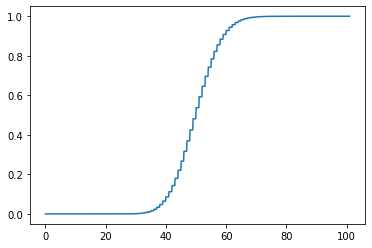

In [ ]:
# Построить график функции распределения дискретной случайной величины, заданной по принципу Пуассона
n=100
xsi = np.arange(0,n+1)
p = [x for x in MyLikePoissonRandomVariable(n,50)]
x = np.linspace(0,max(xsi)+1,1000)
raspr = GenerateDistributionFunction(xsi,p)
y=[raspr(x0) for x0 in x]
plt.plot(x,y)

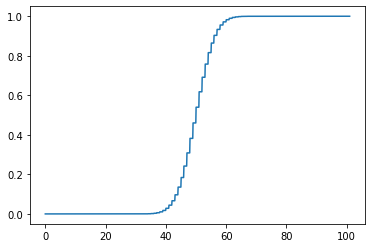

In [ ]:
# Построить график функции распределения дискретной случайной величины, заданной по принципу биномиала
n=100
xsi = np.arange(0,n+1)
p = [x for x in MyLikeBinomRandomVariable(n,0.5)]
x = np.linspace(0,max(xsi)+1,1000)
raspr = GenerateDistributionFunction(xsi,p)
y=[raspr(x0) for x0 in x]
plt.plot(x,y)

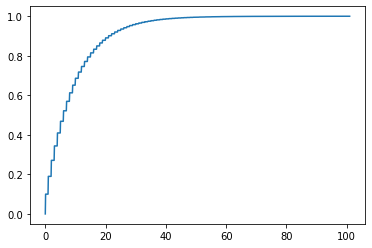

In [ ]:
# Построить график функции распределения дискретной случайной величины, заданной по принципу геиметрического распределения
n=100
xsi = np.arange(0,n+1)
p = [x for x in MyLikeGeomRandomVariable(n,0.1)]
x = np.linspace(0,max(xsi)+1,1000)
raspr = GenerateDistributionFunction(xsi,p)
y=[raspr(x0) for x0 in x]
plt.plot(x,y)

In [ ]:
tex = r"""\begin{array}{  c | c | c | c | c  }
\xi & -2 & -1 & 2 & 4  \\ \hline
\mathsf{P} & 0.2 & 0.1 & 0.3 & 0.4
\end{array}"""
vals,probs = TTDFOVAP(tex)
GenerateDefinitionOfDistributionFunction(vals,probs)

['0 if x<=-2',
 '0.20000000 if -2<x<=-1',
 '0.30000000 if -1<x<=2',
 '0.60000000 if 2<x<=4',
 '1 if x>4']

In [ ]:
a = [0.6,0.7,0.8]

In [ ]:
vals = range(4)
probs = [list_product([(1-x) for x in a]), sum([list_product([y if y == x else (1-y) for y in a]) for x in a]), sum([list_product([y if y != x else (1-y) for y in a]) for x in a]), list_product(a)]

In [ ]:
GenerateDefinitionOfDistributionFunction(vals,probs)

['0 if x<=0',
 '0.02400000 if 0<x<=1',
 '0.21200000 if 1<x<=2',
 '0.66400000 if 2<x<=3',
 '1 if x>3']

In [ ]:
n=5
p=0.71
probs=list(MyLikeBinomRandomVariable(n,p))
vals=range(6)

In [ ]:
probs

[Decimal('0.0020511149'),
 Decimal('0.0251084755'),
 Decimal('0.1229449490'),
 Decimal('0.3010031510'),
 Decimal('0.3684693745'),
 Decimal('0.1804229351')]

In [ ]:
GenerateDefinitionOfDistributionFunction(vals,probs,round=3)

['0 if x<=0',
 '0.002 if 0<x<=1',
 '0.027 if 1<x<=2',
 '0.150 if 2<x<=3',
 '0.451 if 3<x<=4',
 '0.820 if 4<x<=5',
 '1 if x>5']

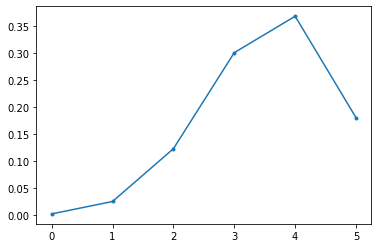

In [ ]:
plt.plot(vals,probs,'.-')

In [ ]:
n=9
p=0.15
probs = [x for x in MyLikeGeomRandomVariable(n,p,round=8)]
vals = range(1,n+1)

In [ ]:
probs

[Decimal('0.15000000'),
 Decimal('0.12750000'),
 Decimal('0.10837500'),
 Decimal('0.09211875'),
 Decimal('0.07830094'),
 Decimal('0.06655580'),
 Decimal('0.05657243'),
 Decimal('0.04808656'),
 Decimal('0.04087358')]

In [ ]:
sum(probs[:7])

Decimal('0.67942292')

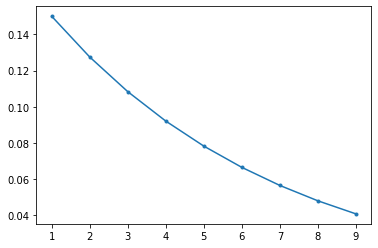

In [ ]:
plt.plot(vals,probs,'.-')

In [ ]:
s=0
n=15
probs = list(MyLikePoissonRandomVariable(n,4.3,round=3))
vals = list(range(n+1))

In [ ]:
1-sum(probs[:8])

0.07199999999999995

In [ ]:
1-GenerateDistributionFunction(vals,probs)(8)

0.07199999999999995

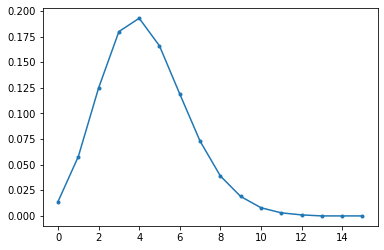

In [ ]:
plt.plot(vals,probs,'.-')

In [ ]:
list(MyLikeBinomRandomVariable(8,0.77))[1]+list(MyLikeBinomRandomVariable(8,0.77))[2]

Decimal('0.0026673106480020')

In [ ]:
sum(MyLikeGeomRandomVariable(6,0.56))

Decimal('0.99274369')

In [ ]:
sum(MyLikePoissonRandomVariable(5,5.5))

0.52891868

In [ ]:
# Для расчёта Ф_0,1(x) можно использовать scipy.stats.norm.cdf(x)
# Для расчёта Ф_a,sigma(x) -> scipy.stats.norm.cdf(x,a,sigma)

In [ ]:
scipy.stats.norm.cdf(6.59,4.5,sqrt(1.21))-scipy.stats.norm.cdf(2.41,4.5,sqrt(1.21))

0.9425668803679963

---
## Random tests

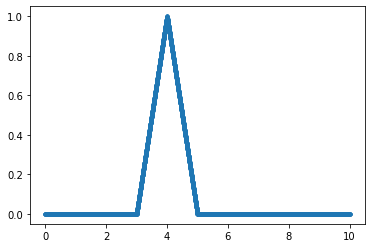

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

def fun (n, x): 
    if n <= x <= n + 1:
        return float(x) - n 
    elif n + 1 <= x <= n + 2:
        return 2.0 - x + n 
    return 0.0 

vfun = np.vectorize(fun)

x = np.linspace(0, 10, 10000)    
y = vfun(3, x)

plt.plot(x, y, '.')
plt.show()

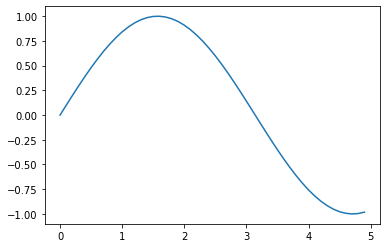

In [ ]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)

In [ ]:
# # 

# # list(pairwise(xsi))

# # [x<=0]   [x>max(xsi)]


# cs = np.cumsum(p)
# ysl = np.array([np.all([i[0]<x,x<=i[1]],axis=0) for i in pairwise(xsi)]+[x>max(xsi)])

# pw = []
# for i in ysl.T:
#   nz = np.nonzero(i)[0]
#   if len(nz)==0: pw.append(0)
#   else: pw.append(np.cumsum(p)[nz[0]])
# # pw.append 

# # np.piecewise(y, ysl, cs[:-1])
# # len(xsi)

# pxsi = pairwise(xsi)





In [ ]:
# zl = list(zip(x,pw))
# zl

In [ ]:
# x

In [ ]:
# np.cumsum(p)

In [ ]:
# plt.plot(x,pw,'.')

In [ ]:
# np.nonzero(ysl.T[2000])[0][0]

In [ ]:
# np.arange(max(xsi)-min(xsi)+1)

In [ ]:
# list(pairwise(xsi))

In [ ]:
# ysl

In [ ]:
# cs[:-1]

In [ ]:
list(MyLikeBinomRandomVariable(8,0.71))

GenerateDefinitionOfDistributionFunction(range(0,9),list(MyLikeBinomRandomVariable(8,0.71)))

['0 if x<=0',
 '0.00005002 if 0<x<=1',
 '0.00102982 if 1<x<=2',
 '0.00942563 if 2<x<=3',
 '0.05053616 if 3<x<=4',
 '0.17634855 if 4<x<=5',
 '0.42276731 if 5<x<=6',
 '0.72441786 if 6<x<=7',
 '0.93542465 if 7<x<=8',
 '1 if x>8']

In [ ]:
0.42276731 - 0.00942563 

0.41334168

---
---
# Week 5

---
---
# Рубежка

---
## Подготовка

In [ ]:
for __ in range(10):
  arr = np.array([1]*5+[0]*10)
  np.random.shuffle(arr)
  n=100000
  c=0
  for _ in range(n):
    if sum(np.random.choice(arr,7))==3: c+=1
  print(c/n)

0.25581
0.25828
0.25579
0.25678
0.25614
0.25444
0.25442
0.25485
0.25509
0.25572


In [ ]:
choices = [list(map(int,list(x))) for x in itertools.product('01',repeat=7) if sum(list(map(int,list(x))))==3]

In [ ]:
len(choices)

35

In [ ]:
p_s=0
for choice in choices:
  k = 5
  z = 10
  p = 1
  for a in choice:
    if a:
      p*=k/(k+z)
      k-=1
    else:
      p*=z/(k+z)
      z-=1
  print(p)
  p_s+=p
print(p_s)

0.009324009324009324
0.009324009324009324
0.009324009324009324
0.009324009324009326
0.009324009324009324
0.009324009324009324
0.009324009324009326
0.009324009324009324
0.009324009324009326
0.009324009324009326
0.009324009324009322
0.009324009324009322
0.009324009324009324
0.009324009324009322
0.009324009324009324
0.009324009324009324
0.009324009324009322
0.009324009324009324
0.009324009324009324
0.009324009324009326
0.009324009324009322
0.009324009324009322
0.009324009324009324
0.009324009324009322
0.009324009324009324
0.009324009324009324
0.009324009324009322
0.009324009324009324
0.009324009324009324
0.009324009324009326
0.009324009324009322
0.009324009324009324
0.009324009324009324
0.009324009324009326
0.009324009324009326
0.3263403263403264


In [ ]:
s = """0.25778
0.25478
0.25771
0.25649
0.25553
0.25475
0.25623
0.25402
0.25592
0.25543""".split()

In [ ]:
np.array(s).astype(float).mean()

0.255864

In [ ]:
k1="""o_1_1
o_1_2
a_1_1
a_1_2
a_1_3""".split()

k2="""o_2_1
o_2_2
o_2_3
a_2_1
a_2_2
a_2_3
a_2_4
a_2_5""".split()

In [ ]:
k3 = list(map(list,list(itertools.product(k1,k2))))

In [ ]:
omega = []

for x in k3:
  omega.append(x+[x[0]])
  omega.append(x+[x[1]])

In [ ]:
omega

[['o_1_1', 'o_2_1', 'o_1_1'],
 ['o_1_1', 'o_2_1', 'o_2_1'],
 ['o_1_1', 'o_2_2', 'o_1_1'],
 ['o_1_1', 'o_2_2', 'o_2_2'],
 ['o_1_1', 'o_2_3', 'o_1_1'],
 ['o_1_1', 'o_2_3', 'o_2_3'],
 ['o_1_1', 'a_2_1', 'o_1_1'],
 ['o_1_1', 'a_2_1', 'a_2_1'],
 ['o_1_1', 'a_2_2', 'o_1_1'],
 ['o_1_1', 'a_2_2', 'a_2_2'],
 ['o_1_1', 'a_2_3', 'o_1_1'],
 ['o_1_1', 'a_2_3', 'a_2_3'],
 ['o_1_1', 'a_2_4', 'o_1_1'],
 ['o_1_1', 'a_2_4', 'a_2_4'],
 ['o_1_1', 'a_2_5', 'o_1_1'],
 ['o_1_1', 'a_2_5', 'a_2_5'],
 ['o_1_2', 'o_2_1', 'o_1_2'],
 ['o_1_2', 'o_2_1', 'o_2_1'],
 ['o_1_2', 'o_2_2', 'o_1_2'],
 ['o_1_2', 'o_2_2', 'o_2_2'],
 ['o_1_2', 'o_2_3', 'o_1_2'],
 ['o_1_2', 'o_2_3', 'o_2_3'],
 ['o_1_2', 'a_2_1', 'o_1_2'],
 ['o_1_2', 'a_2_1', 'a_2_1'],
 ['o_1_2', 'a_2_2', 'o_1_2'],
 ['o_1_2', 'a_2_2', 'a_2_2'],
 ['o_1_2', 'a_2_3', 'o_1_2'],
 ['o_1_2', 'a_2_3', 'a_2_3'],
 ['o_1_2', 'a_2_4', 'o_1_2'],
 ['o_1_2', 'a_2_4', 'a_2_4'],
 ['o_1_2', 'a_2_5', 'o_1_2'],
 ['o_1_2', 'a_2_5', 'a_2_5'],
 ['a_1_1', 'o_2_1', 'a_1_1'],
 ['a_1_1',

In [ ]:
appls = 0
orngs = 0
otv = 0
for x in omega:
  if x[2][0] == 'a': appls+=1
  if x[2][0] == 'o': orngs+=1
  if (x[2][0] == 'a') and (x[2][2] == '2'): otv+=1

In [ ]:
orngs,appls,otv

(31, 49, 25)

In [ ]:
appls/80

0.6125

– Плейлист с вебинарами: https://youtube.com/playlist?list=PLx5jwZiVE4CXQBeH283cIzXJFChThBLxH

– Папка с материалами вебинаров: https://disk.yandex.ru/d/JWWgpaE54pjwFg

– Обновляемое расписание встреч: https://disk.yandex.ru/i/0AU1ycok-UHXdA

---
## Рубежка

In [ ]:
k1="""k_1_1
k_1_2
k_1_3
k_1_4
k_1_5
z_1_1
z_1_2
z_1_3
z_1_4
z_1_5
z_1_6
z_1_7
z_1_8""".split()

k2="""k_2_1
k_2_2
k_2_3
k_2_4
k_2_5
z_2_1
z_2_2
z_2_3
z_2_4
z_2_5
z_2_6
z_2_7
z_2_8
z_2_9""".split()

In [ ]:
# k1="""o_1_1
# o_1_2
# a_1_1
# a_1_2
# a_1_3""".split()

# k2="""o_2_1
# o_2_2
# o_2_3
# a_2_1
# a_2_2
# a_2_3
# a_2_4
# a_2_5
# """.split()

In [ ]:
k3=list(map(list,list(itertools.product(k1,k2))))

In [ ]:
omega = []

for x in k3:
  omega.append(x + [x[0]])
  omega.append(x + [x[1]])

In [ ]:
z_s = 0
ds = 0
for x in omega:
  if x[2][0] == 'z': z_s+=1
  if (x[2][0] == 'z') and (x[2][2] == '2'): ds += 1

In [ ]:
z_s/len(omega)

0.6291208791208791

In [ ]:
229/364

0.6291208791208791

In [ ]:
ds/z_s

0.5109170305676856

In [ ]:
117/229

0.5109170305676856

---
---
# Week 6

---
## Function definitions

In [ ]:
#@title Моды случайной величины
def myModas(vals, probs,most_likely=False):
  vals=list(vals)
  probs=list(probs)
  mds = []
  if probs[0]>probs[1]: mds.append(vals[0])
  for i in range(1,len(probs)-1):
    if probs[i-1]<=probs[i] and probs[i+1]<=probs[i]: mds.append(vals[i])
  if probs[-1]>=probs[-2]: mds.append(vals[-1])
  if most_likely:
    max_prob = max([probs[vals.index(x)] for x in mds])
    mds = [x for x in mds if probs[vals.index(x)]==max_prob]
  return mds

In [ ]:
#@title Медиана выборки (вариационного ряда)
def myMedianFromSeries(vals):
  vals.sort()
  if (len(vals) % 2) != 0:
    return vals[int((len(probs)+1)/2-1)]
  else:
    return 0.5*(vals[int((len(vals))/2-1)]+vals[int((len(vals))/2+1-1)])

In [ ]:
#@title Математическое ожидание выборки (выборочное среднее)
def myExpectedValueFromSeries(vals):
  return sum(vals)/len(vals)

In [ ]:
#@title Дисперсия выборки (выборочная дисперсия)
def myVarianceFromSeries(vals):
  return 1/len(vals)*sum(map(lambda a: (a - myExpectedValueFromSeries(vals))**2, vals))

In [ ]:
#@title Выборка из эмпирического распределения
def myGenerateSeriesFromValsProbs(vals,probs,znam):
  vals2=[]
  for v,p in zip(vals,probs):
    vals2+=[v]*int(p*znam)
  return vals2

In [ ]:
#@title Эмпирическое распределение из выборки
def myGenerateValsProbsFromSeries(vals, raw=False):
  vals2, probs = np.unique(vals, return_counts=True)
  if not raw: probs = probs/len(vals)
  if not raw: return vals2,probs
  else: return vals2,probs,len(vals)

---
## Code itself

In [ ]:
vals = [1,2,3,4,5]
probs = [1/8,1/4,1/6,1/12,9/24]

In [ ]:
myModas(vals, probs)

[2, 5]

In [ ]:
np.random.seed(71)
sample = np.random.uniform(10, 13, 19) #генерация выборки
with np.printoptions(precision=2):
  print(sample) #вывод выборки на печать
print(sum(sample)/len(sample))

[10.56 11.16 12.5  10.6  12.75 12.36 12.17 12.99 12.54 10.7  10.97 12.15
 10.31 11.8  10.41 12.7  10.74 12.86 12.36]
11.716385300416185


In [ ]:
vals = [4,5,7,9,10,12]
probs = [2/10,1/10,1/10,3/10,1/10,2/10]
ser = myGenerateSeriesFromValsProbs(vals,probs,10)

In [ ]:
myVarianceFromSeries(ser)

8.090000000000002

In [ ]:
myMedianFromSeries(ser)

9.0

In [ ]:
myModas(vals,probs)

[4, 9, 12]

In [ ]:
vals=[4,6,3,4,4,2,4,4,5,1,2,1]

In [ ]:
myGenerateValsProbsFromSeries(vals,True)

(array([1, 2, 3, 4, 5, 6]), array([2, 2, 1, 5, 1, 1]), 12)

In [ ]:
myExpectedValueFromSeries(vals)

3.3333333333333335

In [ ]:
myVarianceFromSeries(vals)

2.2222222222222223

In [ ]:
myMedianFromSeries(vals)

4.0

In [ ]:
myModas(*myGenerateValsProbsFromSeries(vals,False),True)

[4]

In [ ]:
import csv

In [ ]:
with open('Binomial_10000_103.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [ ]:
data=list(map(float,list(map(lambda a: a[0], data))))

In [ ]:
sum(data)/len(data)

14.5464

In [ ]:
myVarianceFromSeries(data)

0.43824704000003795

---
---
# Week 7

---
## Function Definitions

In [ ]:
#@title Выборочный момент н-го порядка
def MyNthMoment(vals, n=1):
  return sum(x**n for x in vals)/len(vals)

In [ ]:
#@title Смещённая выборочная дисперсия
def MyVariance3(vals):
  return MyNthMoment(vals,2)-MyNthMoment(vals)**2

In [ ]:
#@title Несмещёная выборочная дисперсия
def MyNotShiftedVariance(vals):
  return len(vals)/(len(vals)-1) * MyVariance3(vals)

In [ ]:
#@title Квантиль альфа-уровня
def MyQuantile(vals, alpha):
  vals.sort()
  if (len(vals)*alpha) == int(len(vals)*alpha):
    return (vals[int(len(vals)*alpha)-1]+vals[int(len(vals)*alpha)-1+1])/2
  else:
    return vals(round(len(vals)*alpha)+1)

---
## Code itself

In [ ]:
a = [3,1,3,2,2,3,1,3,1,4,1,2,1,4,3,2,3,3,1,0,1,3,3,1,2,2,5,2,2,0]

In [ ]:
vals,probs=myGenerateValsProbsFromSeries(a)

In [ ]:
vals,probs=myGenerateValsProbsFromSeries(a)

In [ ]:
GenerateDefinitionOfDistributionFunction(vals,probs)

['0 if x<=0',
 '0.06666667 if 0<x<=1',
 '0.33333333 if 1<x<=2',
 '0.60000000 if 2<x<=3',
 '0.90000000 if 3<x<=4',
 '0.96666667 if 4<x<=5',
 '1 if x>5']

In [ ]:
vals

array([0, 1, 2, 3, 4, 5])

In [ ]:
probs

array([0.06666667, 0.26666667, 0.26666667, 0.3       , 0.06666667,
       0.03333333])

<BarContainer object of 6 artists>

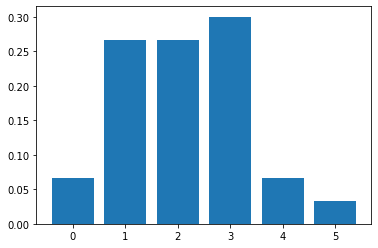

In [ ]:
plt.bar(vals,probs)

In [ ]:
MyNthMoment(a)

2.1333333333333333

In [ ]:
MyVariance3(a)

1.3822222222222225

In [ ]:
MyNotShiftedVariance(a)

1.4298850574712647

In [ ]:
myVarianceFromSeries(a)

1.3822222222222222

In [ ]:
np.quantile(a,0.75)

3.0

In [ ]:
salaries="""25960
43156
47526
32166
31163
27403
31647
30097
36081
31286
78946
58310
31008
39797
40728
26053
42921
25318
32473
38005
71553
25699
27580
27948
33258
44692
27887
30125
42434
30775
101662
50135
56005
30820
36048
32013
29892
26834
30112
34809
27339
27455
37764
33137
37867
24550
25663
25719
39755
48316
28400
28232
26999
65881
26108
35722
35619
37949
30647
31192
26555
73261
37605
29566
28256
26754
30764
39707
33933
61937
31990
27927
46583
62555
34944
26108
27028
96930
86560
33882
""".split()

In [ ]:
salaries=list(map(float,salaries))

In [ ]:
salaries.sort()

In [ ]:
salaries[62-1]

42434.0

In [ ]:
np.histogram(salaries,10)

(array([41, 19,  7,  2,  4,  1,  2,  1,  1,  2]),
 array([ 24550. ,  32261.2,  39972.4,  47683.6,  55394.8,  63106. ,
         70817.2,  78528.4,  86239.6,  93950.8, 101662. ]))

In [ ]:
MyNthMoment(salaries)

38468.55

In [ ]:
MyVariance3(salaries)

264880095.44749975

In [ ]:
MyNotShiftedVariance(salaries)

268233008.04810104

In [ ]:
np.quantile(salaries,0.25)

27942.75

In [ ]:
len(salaries)*0.75

60.0

In [ ]:
(salaries[60-1]+salaries[60-1+1])/2

40262.5

In [ ]:
MyQuantile(salaries, 0.5)

32089.5

---
---
#Week 8

In [ ]:
with open('Geometric_5.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)
data=list(map(float,list(map(lambda a: a[0], data))))

In [ ]:
sum(data)/len(data)

3.4511

In [ ]:
MyNthMoment(data,2)

20.1383

In [ ]:
(-1+sqrt(1+8*MyNthMoment(data,2)))/(2*MyNthMoment(data,2))

0.2912882706589805

In [ ]:
theta=1/MyNthMoment(data)

In [ ]:
(1-theta)**6*theta

0.03719318530147477

---
---
# Week 9

In [ ]:
with open('Geometric_380.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)
data=list(map(float,list(map(lambda a: a[0], data))))

In [ ]:
avg=sum(data)/len(data)

In [ ]:
stats.norm.ppf(1-(1-0.95)/2)

1.959963984540054

In [ ]:
(1/avg) - stats.norm.ppf(1-(1-0.95)/2) * (sqrt(1-(1/avg))) / (sqrt(len(data)*avg))

0.36912339480221174

In [ ]:
(1/avg) + stats.norm.ppf(1-(1-0.95)/2) * (sqrt(1-(1/avg))) / (sqrt(len(data)*avg))

0.38813683767667967

---
---
# Week 10

---
## Function Definitions

In [ ]:
#@title Генератор непрерывной эмпирической функции распределения
def MyGenerateEmpiricDisctibutionFunction(vals):
  mlen = len(vals)
  def EmpDistFunc(t,mr=8):
    loclen = mlen
    locvals = vals
    return round(sum(1 for x in locvals if x<t)/loclen, mr)
  return EmpDistFunc

In [ ]:
#@title Получить файл по ссылке
def retrieveFile(murl):
  fileName = os.path.basename(murl)
  urllib.request.urlretrieve(murl,fileName)
  return fileName

In [ ]:
#@title csv -> list of floats
def RetrievedCsvFileToList(filename: str):
  if filename.endswith('.csv'): filename = filename[:-4]
  with open(f'{filename}.csv', newline='', encoding='utf-8-sig') as f:
    reader = csv.reader(f)
    data = list(reader)
  data=list(map(float,list(map(lambda a: a[0], data))))
  return data

In [ ]:
#@title Генератор функции равномерного распределения
def genUnDistF(vals):
  la = min(data)
  lb = max(data)
  def fff(t,r=8):
    a = la
    b = lb
    if (t<a): return 0
    if t>=b: return 1
    return round((t-a)/(b-a), r)
  return fff

---
## Code Itself

In [ ]:
with open('hypothesis_2.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)
data=data[1:]
data=list(map(float,list(map(lambda a: a[0], data))))

In [ ]:
a=min(data)
b=max(data)

In [ ]:
f=MyGenerateEmpiricDisctibutionFunction(data)

In [ ]:
f_U=genUnDistF(data)

In [ ]:
# неправильно!
for n in range(int(a),int(b-1)):
  print(abs(f_U(n-1,2)-f(n,2)))

0.0
0.07
0.10999999999999999
0.18
0.3
0.35
0.37
0.36
0.29000000000000004


In [ ]:
GenerateDefinitionOfDistributionFunction(*myGenerateValsProbsFromSeries(data),round=2)

['0 if x<=0.0',
 '0.07 if 0.0<x<=1.0',
 '0.21 if 1.0<x<=2.0',
 '0.38 if 2.0<x<=3.0',
 '0.60 if 3.0<x<=4.0',
 '0.75 if 4.0<x<=5.0',
 '0.87 if 5.0<x<=6.0',
 '0.96 if 6.0<x<=7.0',
 '0.99 if 7.0<x<=10.0',
 '1 if x>10.0']

In [ ]:
with open('Hyp_2_1_X.csv', newline='') as f:
    reader = csv.reader(f)
    dataX = list(reader)
# dataX=dataX[1:]
dataX=list(map(float,list(map(lambda a: a[0], dataX))))

In [ ]:
dataX

In [ ]:
with open('Hyp_2_1_Y.csv', newline='') as f:
    reader = csv.reader(f)
    dataY = list(reader)
# dataY=dataY[1:]
dataY=list(map(float,list(map(lambda a: a[0], dataY))))

In [ ]:
GenerateDefinitionOfDistributionFunction(*myGenerateValsProbsFromSeries(dataX),round=1)

['0 if x<=98.7',
 '0.1 if 98.7<x<=101.4',
 '0.2 if 101.4<x<=102.7',
 '0.3 if 102.7<x<=103.6',
 '0.4 if 103.6<x<=104.2',
 '0.5 if 104.2<x<=105.7',
 '0.6 if 105.7<x<=105.9',
 '0.7 if 105.9<x<=112.6',
 '0.8 if 112.6<x<=121.5',
 '0.9 if 121.5<x<=123.5',
 '1 if x>123.5']

In [ ]:
GenerateDefinitionOfDistributionFunction(*myGenerateValsProbsFromSeries(dataY),round=1)

['0 if x<=108.9',
 '0.2 if 108.9<x<=110.3',
 '0.4 if 110.3<x<=110.9',
 '0.6 if 110.9<x<=113.6',
 '0.8 if 113.6<x<=116.7',
 '1 if x>116.7']

In [ ]:
myGenerateValsProbsFromSeries(dataX)

(array([ 98.7, 101.4, 102.7, 103.6, 105.7, 105.9, 112.6, 121.5, 123.5]),
 array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.11111111]))

In [ ]:
g_x=GenerateDistributionFunction(*myGenerateValsProbsFromSeries(dataX))
g_y=GenerateDistributionFunction(*myGenerateValsProbsFromSeries(dataY))

In [ ]:
max([abs(g_x(x)-g_y(x)) for x in np.arange(98.7,123.7,0.1)])*sqrt((len(dataX)*len(dataY))/(len(dataX)+len(dataY)))

1.2171612389003694

In [ ]:
max([abs(g_x(x)-g_y(x)) for x in np.arange(98.7,123.7,0.1)])

0.6666666666666667

In [ ]:
0.7*sqrt((len(dataX)*len(dataY))/(len(dataX)+len(dataY)))

1.2780193008453875

In [ ]:
len(dataX)

9

In [ ]:
MyVariance2(*myGenerateValsProbsFromSeries(dataX))

64.52959999999621

In [ ]:
MyVariance3(dataX)

64.52959999999985

In [ ]:
with open('hypothesis_5_X.csv', newline='') as f:
    reader = csv.reader(f)
    dataX = list(reader)
# dataY=dataY[1:]
dataX=list(map(float,list(map(lambda a: a[0], dataX))))

In [ ]:
with open('hypothesis_5_Y.csv', newline='', encoding='utf-8-sig') as f:
    reader = csv.reader(f)
    dataY = list(reader)
# dataY=dataY[1:]
dataY=list(map(float,list(map(lambda a: a[0], dataY))))

In [ ]:
sqrt((len(dataX)*len(dataY))/(len(dataX)+len(dataY)))*(MyNthMoment(dataX)-MyNthMoment(dataY))/sqrt(((len(dataX)-1)*MyNotShiftedVariance(dataX)+(len(dataY)-1)*MyNotShiftedVariance(dataY))/(len(dataX)+len(dataY)-2))

-2.753039845218708

In [ ]:
print(os.path.basename('https://courses.openedu.ru/assets/courseware/v1/9324986324003388812cd9988a00d9a9/asset-v1:ITMOUniversity+APPSTAT+fall_2022_ITMO+type@asset+block/hypothesis_6_X.csv'))

hypothesis_6_X.csv


In [ ]:
retrieveFile('https://courses.openedu.ru/assets/courseware/v1/9324986324003388812cd9988a00d9a9/asset-v1:ITMOUniversity+APPSTAT+fall_2022_ITMO+type@asset+block/hypothesis_6_X.csv')

'hypothesis_6_X.csv'

In [ ]:
with open('hypothesis_6_X.csv', newline='', encoding='utf-8-sig') as f:
    reader = csv.reader(f)
    dataX = list(reader)
# dataY=dataY[1:]
dataX=list(map(float,list(map(lambda a: a[0], dataX))))

In [ ]:
retrieveFile('https://courses.openedu.ru/assets/courseware/v1/a6ad1483049b98dc8a179c10d00a0b16/asset-v1:ITMOUniversity+APPSTAT+fall_2022_ITMO+type@asset+block/hypothesis_6_Y.csv')

'hypothesis_6_Y.csv'

In [ ]:
with open('hypothesis_6_Y.csv', newline='', encoding='utf-8-sig') as f:
    reader = csv.reader(f)
    dataY = list(reader)
# dataY=dataY[1:]
dataY=list(map(float,list(map(lambda a: a[0], dataY))))

In [ ]:
scipy.stats.f(len(dataX)-1,len(dataY)-1).ppf(0.05/2)

0.24838585469445493

In [ ]:
scipy.stats.f(len(dataX)-1,len(dataY)-1).ppf(1-0.05/2)

4.025994158282978

In [ ]:
MyNotShiftedVariance(dataX)/MyNotShiftedVariance(dataY)

0.5184280719624661

In [ ]:
retrieveFile('https://courses.openedu.ru/assets/courseware/v1/1aabe33c4ff62f1c3aab3e833ab17152/asset-v1:ITMOUniversity+APPSTAT+fall_2022_ITMO+type@asset+block/hypothesis_4.csv')

'hypothesis_4.csv'

In [ ]:
data = RetrievedCsvFileToList('hypothesis_4.csv')

In [ ]:
MyNthMoment(data)

29.32146746207217

In [ ]:
sqrt(len(data))*(MyNthMoment(data)-26)/(sqrt(6))

4.287996055191778

In [ ]:
filename=retrieveFile('https://courses.openedu.ru/assets/courseware/v1/e438443bb95ef4ade6ca5322e54200df/asset-v1:ITMOUniversity+APPSTAT+fall_2022_ITMO+type@asset+block/hypothesis_3.csv')

In [ ]:
data=RetrievedCsvFileToList(filename)

In [ ]:
MyNthMoment(data)

999.7842287484671

In [ ]:
sqrt(MyNotShiftedVariance(data))

1.777534829255125

In [ ]:
sqrt(len(data))*(MyNthMoment(data)-1000)/(sqrt(MyNotShiftedVariance(data)))

-0.542863271174323

In [ ]:
scipy.stats.t(len(data)-1).ppf(1-0.05/2)

2.093024054408263

In [ ]:
filename=retrieveFile('https://courses.openedu.ru/assets/courseware/v1/c52c156071d6c9b533a59faf69f93749/asset-v1:ITMOUniversity+APPSTAT+fall_2022_ITMO+type@asset+block/Hypothesis_1_21.csv')
data=RetrievedCsvFileToList(filename)

In [ ]:
MyNthMoment(data)

87.94416666666666

In [ ]:
sqrt(MyNotShiftedVariance(data))

8.489295881677604

In [ ]:
a0=91

In [ ]:
sqrt(len(data))*(MyNthMoment(data)-a0)/(sqrt(MyNotShiftedVariance(data)))

-0.8817259417015108

In [ ]:
scipy.stats.t(len(data)-1).ppf(1-0.01/2)

4.032142983557536